# Statistical Modeling

In this assignment, you will perform hypothesis testing, calculate correlation coefficients, build linear regression models, and diagnose potential issues in the models using Python.

Tasks:

1. Hypothesis: Locate a dataset containing the heights, weights, and ages of at least 500 individual males and females. Conduct a hypothesis test to determine whether there is a significant difference in the mean weight between males and females. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

2. Correlation Coefficient: Using the same dataset as in Task 1, calculate the correlation coefficient between height and weight. Interpret the coefficient and visualize the relationship between the two variables using a scatter plot. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

3. Linear Regression Model:  Using the same dataset as in Task 1, build a linear regression model to predict weight based on height. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

4. Multiple Regression Model: Continuing with the dataset from Task 3, build a multiple regression model to predict weight based on height and age. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

5. Solutions: Identify and discuss two common assumptions of linear regression models. Using a dataset of your choice, build a linear regression model that violates one of these assumptions. Perform model verification to determine any violation and propose a solution to address the issue. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

6. Nonlinear Model: Using the same dataset as in Task 5, propose a non-linear model to predict the response variable. Compare the performance of the non-linear model to that of the linear regression model built in Task 5, using appropriate metrics. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

## 1. Hypothesis

Locate a dataset containing the heights, weights, and ages of at least 500 individual males and females. Conduct a hypothesis test to determine whether there is a significant difference in the mean weight between males and females. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

### Step 1: Import Packages and load dataset

In [157]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

In [158]:
#read the dataset
df = pd.read_csv("BodyFat - Extended.csv")
df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [159]:
#extract only Sex, Age, Weight, and Height 
df1 = df[["Sex", "Age", "Weight", "Height"]]
df1.head()

,Sex,Age,Weight,Height
0,M,23,69.97,1.72
1,M,22,78.59,1.84
2,M,22,69.85,1.68
3,M,26,83.80,1.84
4,M,24,83.58,1.81


### Step 2: data set exploration.

 we present the descriptive statistics of the data. 

In [160]:
# Exploration of dataframe (df1):


print("Use head() to show a sample of data")
print(df1.head())
print("")
print("Use describe() to summarize DF1")
print(df1.describe(include='all'))
print("")
print("For a more thorough examination of observations by SEX use values_counts()")
print(df1['Sex'].value_counts())


Use head() to show a sample of data
  Sex  Age  Weight  Height
0   M   23   69.97    1.72
1   M   22   78.59    1.84
2   M   22   69.85    1.68
3   M   26   83.80    1.84
4   M   24   83.58    1.81

Use describe() to summarize DF1
        Sex         Age      Weight      Height
count   436  436.000000  436.000000  436.000000
unique    2         NaN         NaN         NaN
top       M         NaN         NaN         NaN
freq    252         NaN         NaN         NaN
mean    NaN   34.545872   72.282203    1.734048
std     NaN   15.500099   15.464366    0.098359
min     NaN    1.000000   42.184800    0.750000
25%     NaN   21.000000   59.875200    1.668780
50%     NaN   28.500000   70.815800    1.730000
75%     NaN   46.000000   81.560000    1.800000
max     NaN   81.000000  164.720000    1.970000

For a more thorough examination of observations by SEX use values_counts()
Sex
M    252
F    184
Name: count, dtype: int64


In [161]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     436 non-null    object 
 1   Age     436 non-null    int64  
 2   Weight  436 non-null    float64
 3   Height  436 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.8+ KB


C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


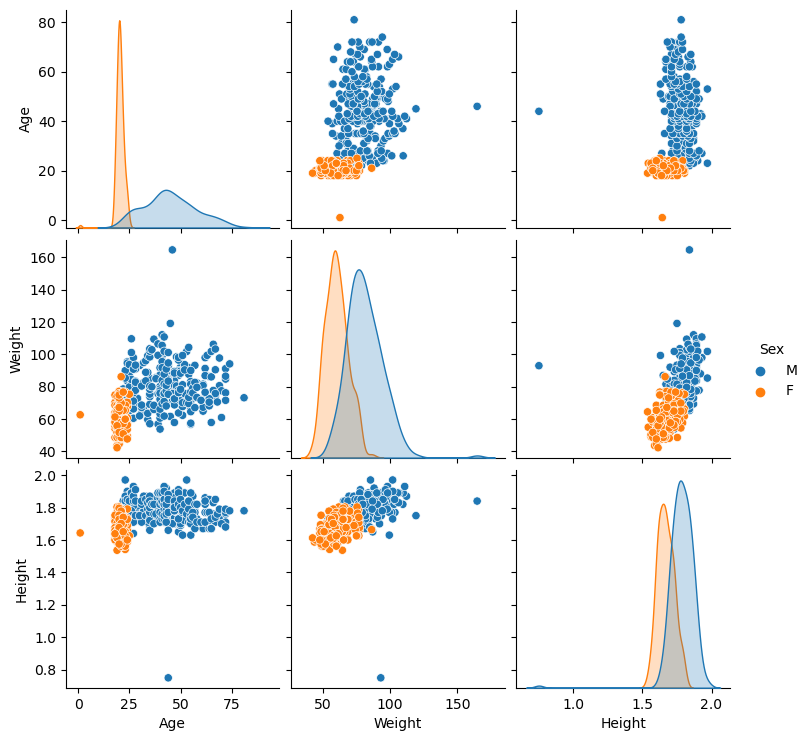

In [162]:
p = sns.pairplot(df1, hue= "Sex")

In [163]:
# Define a function to remove outliers based on z-score


df1['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df1
#df[['Height', 'Weight']]

C:\Users\ARMAND\AppData\Local\Temp\ipykernel_17612\552686627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()


,Sex,Age,Weight,Height,zscore
0,M,23,69.9700,1.7200,-0.142823
1,M,22,78.5900,1.8400,1.077198
2,M,22,69.8500,1.6800,-0.549497
3,M,26,83.8000,1.8400,1.077198
4,M,24,83.5800,1.8100,0.772193
...,...,...,...,...,...
431,F,23,59.8752,1.5621,-1.748168
432,F,21,48.5352,1.5748,-1.619049
433,F,20,51.7104,1.5748,-1.619049
434,F,22,50.8032,1.6510,-0.844336


In [164]:
df1[(df1.zscore<-3) | (df1.zscore>3)]

,Sex,Age,Weight,Height,zscore
41,M,44,92.99,0.75,-10.004664


In [165]:

#df_no_outliers
df1 = df1[(df1.zscore>-3) & (df1.zscore<3)]
print(df1)

    Sex  Age   Weight  Height    zscore
0     M   23  69.9700  1.7200 -0.142823
1     M   22  78.5900  1.8400  1.077198
2     M   22  69.8500  1.6800 -0.549497
3     M   26  83.8000  1.8400  1.077198
4     M   24  83.5800  1.8100  0.772193
..   ..  ...      ...     ...       ...
431   F   23  59.8752  1.5621 -1.748168
432   F   21  48.5352  1.5748 -1.619049
433   F   20  51.7104  1.5748 -1.619049
434   F   22  50.8032  1.6510 -0.844336
435   F   24  47.6280  1.6002 -1.360811

[435 rows x 5 columns]


In [166]:
# Define a function to remove outliers based on z-score

#z_scores = np.abs((df1 - df1.mean()) / df1.std())

df1['zscore'] = ( df.Weight - df.Weight.mean() ) / df.Weight.std()
df1

C:\Users\ARMAND\AppData\Local\Temp\ipykernel_17612\4027136351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = ( df.Weight - df.Weight.mean() ) / df.Weight.std()


,Sex,Age,Weight,Height,zscore
0,M,23,69.9700,1.7200,-0.149518
1,M,22,78.5900,1.8400,0.407892
2,M,22,69.8500,1.6800,-0.157278
3,M,26,83.8000,1.8400,0.744796
4,M,24,83.5800,1.8100,0.730570
...,...,...,...,...,...
431,F,23,59.8752,1.5621,-0.802296
432,F,21,48.5352,1.5748,-1.535595
433,F,20,51.7104,1.5748,-1.330271
434,F,22,50.8032,1.6510,-1.388935


In [167]:
df1[(df1.zscore<-3) | (df1.zscore>3)]

,Sex,Age,Weight,Height,zscore
38,M,46,164.72,1.84,5.977471
40,M,45,119.18,1.75,3.032636


In [168]:

#df_no_outliers
df1 = df1[(df1.zscore>-3) & (df1.zscore<3)]
print(df1)

    Sex  Age   Weight  Height    zscore
0     M   23  69.9700  1.7200 -0.149518
1     M   22  78.5900  1.8400  0.407892
2     M   22  69.8500  1.6800 -0.157278
3     M   26  83.8000  1.8400  0.744796
4     M   24  83.5800  1.8100  0.730570
..   ..  ...      ...     ...       ...
431   F   23  59.8752  1.5621 -0.802296
432   F   21  48.5352  1.5748 -1.535595
433   F   20  51.7104  1.5748 -1.330271
434   F   22  50.8032  1.6510 -1.388935
435   F   24  47.6280  1.6002 -1.594259

[433 rows x 5 columns]


In [169]:
# Separate data for males and females
male_data = df1[df1['Sex'] == 'M']
male_data = male_data[["Sex",  "Weight"]]

female_data = df1[df1['Sex'] == 'F']
female_data = female_data[["Sex",  "Weight"]]


In [170]:
male_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     249 non-null    object 
 1   Weight  249 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [171]:
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 252 to 435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     184 non-null    object 
 1   Weight  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [172]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_data['Weight'], female_data['Weight'])



In [173]:
# Step 4: Calculate relevant statistics
effect_size = np.abs((male_data['Weight'].mean() - female_data['Weight'].mean()) / np.sqrt((male_data['Weight'].std() ** 2 + female_data['Weight'].std() ** 2) / 2))



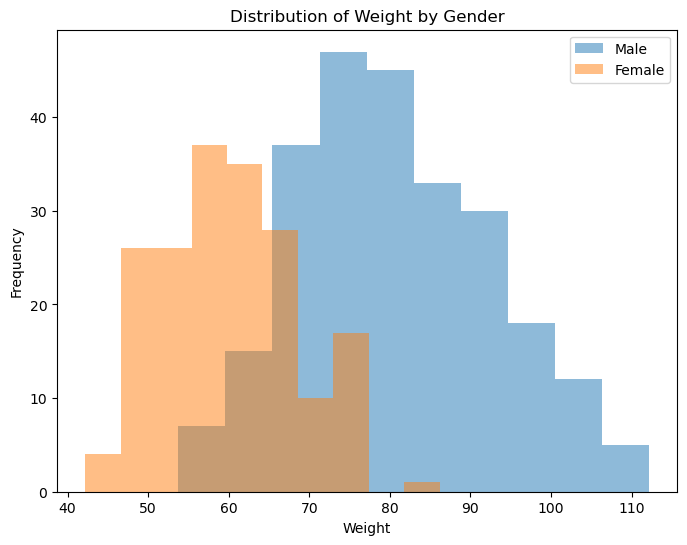

In [174]:
# Step 5: Visualize the data and results
plt.figure(figsize=(8, 6))
plt.hist(male_data['Weight'], alpha=0.5, label='Male')
plt.hist(female_data['Weight'], alpha=0.5, label='Female')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight by Gender')
plt.legend()
plt.show()



In [175]:
# Write a report discussing the findings
print('Independent Samples t-test Results:')
print('t-statistic:', t_statistic)
print('p-value:', p_value)
print('Effect Size (Cohen\'s d):', effect_size)

Independent Samples t-test Results:
t-statistic: 19.912685116492046
p-value: 4.923473580611546e-63
Effect Size (Cohen's d): 1.9882904976001068


Conclusion: Based on the results of the t-test, we reject the null hypothesis and conclude that there is a significant difference in the mean weight between males and females.

## 2. Correlation Coefficient:

In [176]:

# Step 2: Calculate the correlation coefficient
correlation_coefficient = df1['Height'].corr(df1['Weight'])
correlation_coefficient

0.7316352984698637

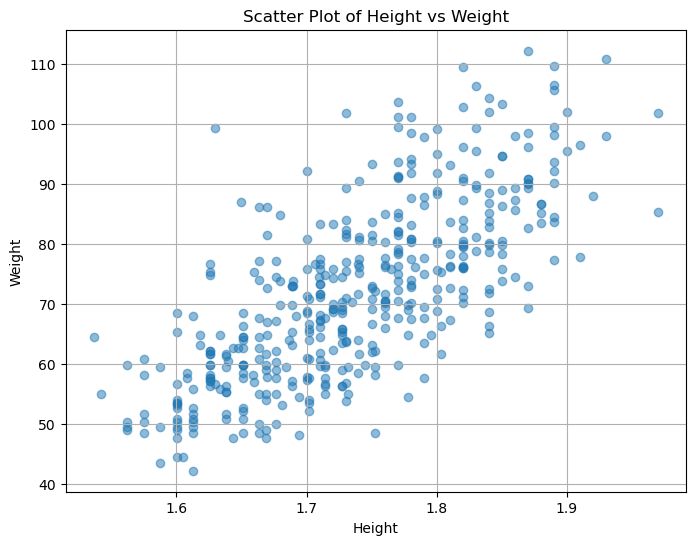

In [177]:

# Step 3: Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df1['Height'], df1['Weight'], alpha=0.5)
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()



In [178]:
# Step 4: Print the correlation coefficient
print(f'Correlation Coefficient between Height and Weight: {correlation_coefficient}')

Correlation Coefficient between Height and Weight: 0.7316352984698637


## 3. Linear Regression Model

C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


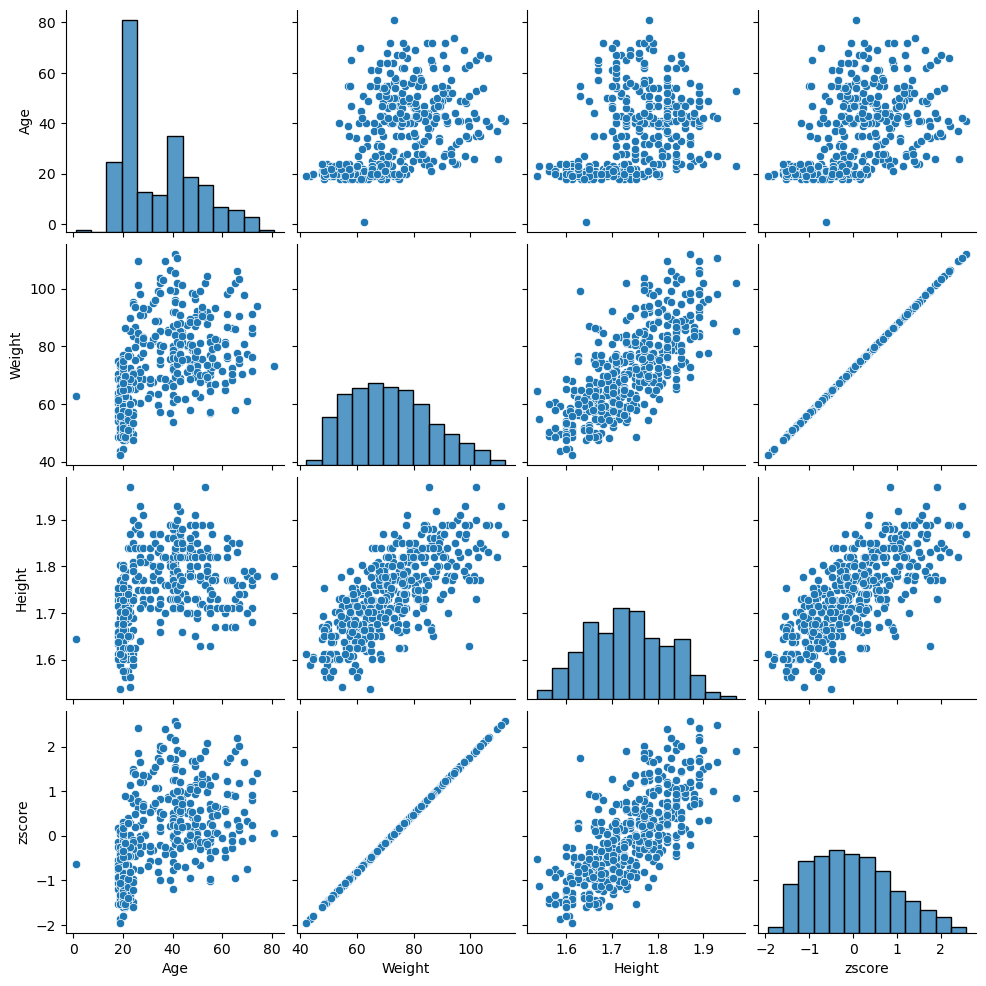

In [179]:
# Create a pairplot of the data.

sns.pairplot(df1);

C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


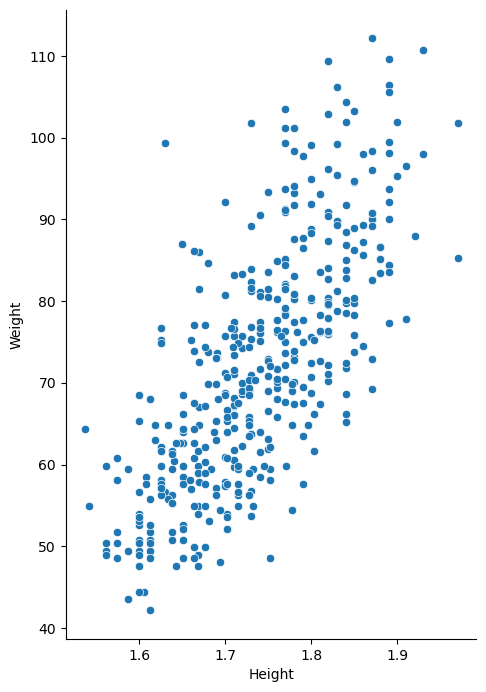

In [180]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df1, x_vars='Height', y_vars='Weight', size=7, aspect=0.7)

In [181]:
# Step 3: Prepare the data
X = df1[['Height']]  # Feature: Height
y = df1['Weight']    # Target variable: Weight



### Build and fit the model

In [182]:

# Define the OLS formula.
ols_formula = 'Height ~ Weight'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = df1)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     496.5
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           9.93e-74
Time:                        00:41:49   Log-Likelihood:                 612.20
No. Observations:                 433   AIC:                            -1220.
Df Residuals:                     431   BIC:                            -1212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4258      0.014    100.336      0.000       1.398       1.454
Weight         0.0043      0.000     22.281      0.000       0.004       0.005
==============================================================================
Omnibus:                        0.755   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.580
Skew:                          -0.074   Prob(JB):                        0.748
Kurtosis:                       3.101   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

    Linearity
    Independent Observations
    Normality
    Homoscedasticity



### - linearity
The linearity assumption requires a linear relationship between the independent and dependent variables. 

Let's create a scatterplot comparing the variable Height you've selected with the variable Weight.

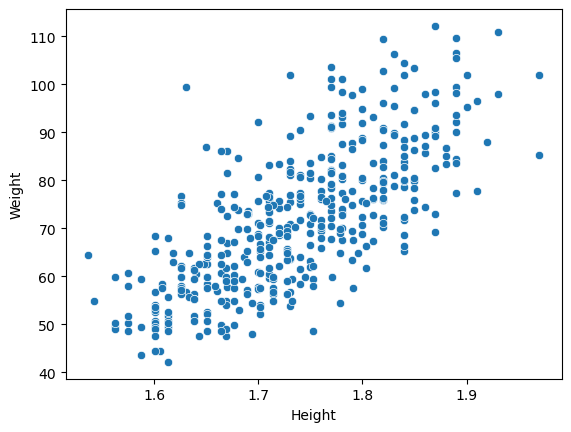

In [183]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x = df1['Height'], y = df1['Weight']);

### independent
The independent observation assumption states that each observation in the data set is independent. As each line is independent of the others, the independence assumption is not violated.

### normality
The **normality assumption** states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

In [184]:
# Calculate the residuals.


residuals = model.resid

residuals.head()

0   -0.007658
1    0.075152
2   -0.047140
3    0.052674
4    0.023623
dtype: float64

In [185]:
residuals.mean()

3.917830904450899e-16

<Axes: ylabel='Count'>

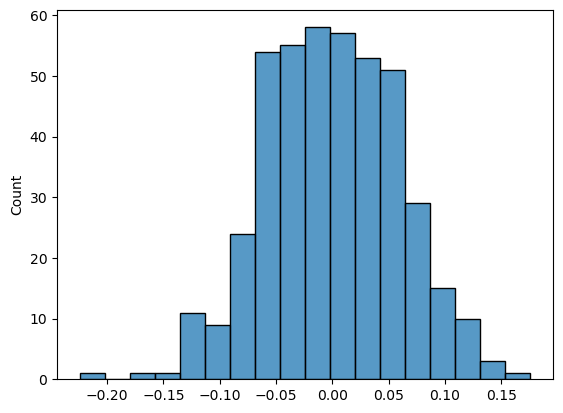

In [186]:
# Create a histogram with the residuals .

sns.histplot(residuals)




The histogram of residuals is approximately normally distributed, confirming that the normality assumption is met for this model.

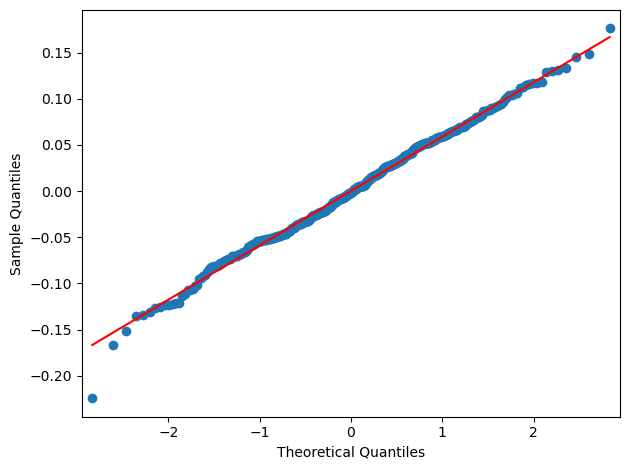

In [187]:

# Create a Q-Q plot of the residuals.


sm.qqplot(residuals, line='s')


# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

The residuals in the Q-Q plot form a straight line, which also confirms that the normality assumption is met.

### homoscedasticity

The assumption of homoscedasticity (constant variance) is that the residuals have a constant variance for all values of X.

Let's check that this assumption is not violated by creating a scatterplot with fitted values and residuals. Let's add a line at 𝑦=0
to display the variance of the residuals above and below 𝑦=0.

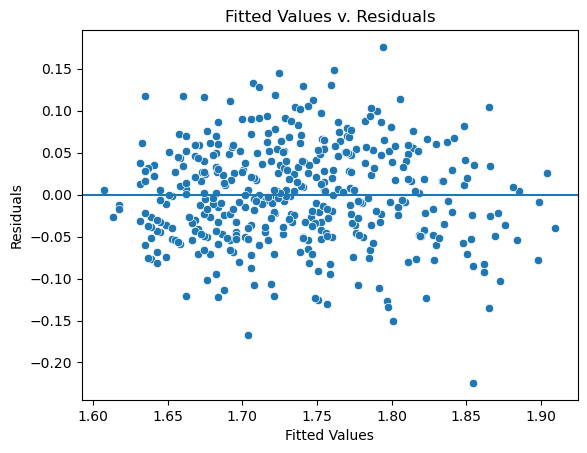

In [188]:
# we create a scatter plot with the model's fitted values and residuals..


fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# we Set the x-axis label.
fig.set_xlabel("Fitted Values")

# we Set the y-axis label.
fig.set_ylabel("Residuals")

# we Set the title.
fig.set_title("Fitted Values v. Residuals")

#  we add a line at y = 0 to visualize the variance of residuals above and below 0.


fig.axhline(0)

plt.show()

The variance of the residuals is consistant across all 𝑋. Thus, the assumption of homoscedasticity is met.

# 4. Multiple Regression Model

C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


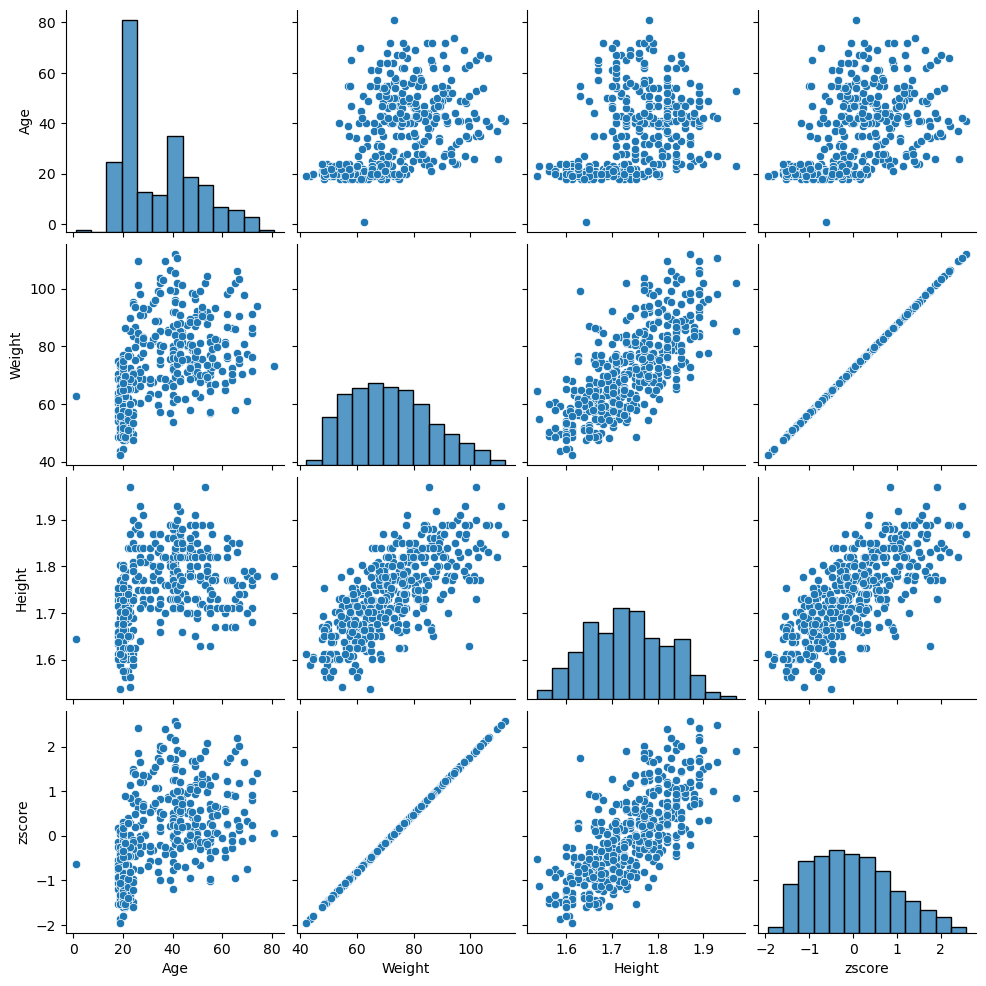

In [189]:
# pairplot of the data.

sns.pairplot(df1);

In [190]:
# Define the OLS formula.

ols_formula = 'Weight ~ Height + Age'

# Create an OLS model.



OLS = ols(formula = ols_formula, data = df1)
# Fit the model.


model = OLS.fit()

# Save the results summary.


model_results = model.summary()

# Display the model results.


model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     310.2
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           4.03e-84
Time:                        00:41:56   Log-Likelihood:                -1583.1
No. Observations:                 433   AIC:                             3172.
Df Residuals:                     430   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -118.0328      9.688    -12.183      0.000    -137.075     -98.991
Height       104.5024      5.828     17.931      0.000      93.047     115.957
Age            0.2473      0.032      7.624      0.000       0.184       0.311
==============================================================================
Omnibus:                       21.195   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.920
Skew:                           0.546   Prob(JB):                     1.05e-05
Kurtosis:                       3.281   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

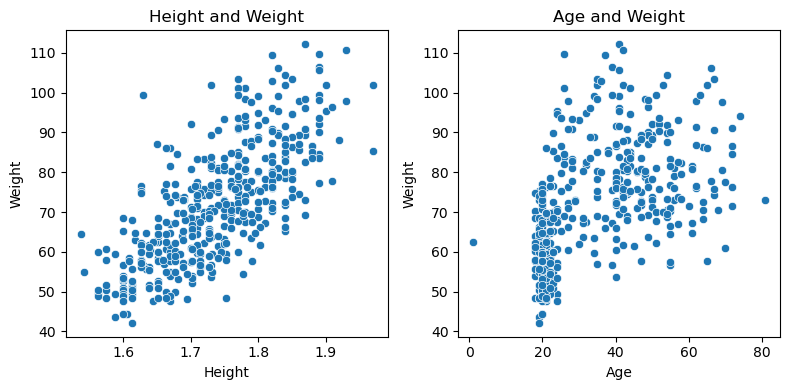

In [191]:
# Create a scatterplot for each independent variable and the dependent variable.


# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = df1['Height'], y = df1['Weight'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Height and Weight")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = df1['Age'], y = df1['Weight'],ax=axes[1])


# Set the title of the second plot.
axes[1].set_title("Age and Weight")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Age")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

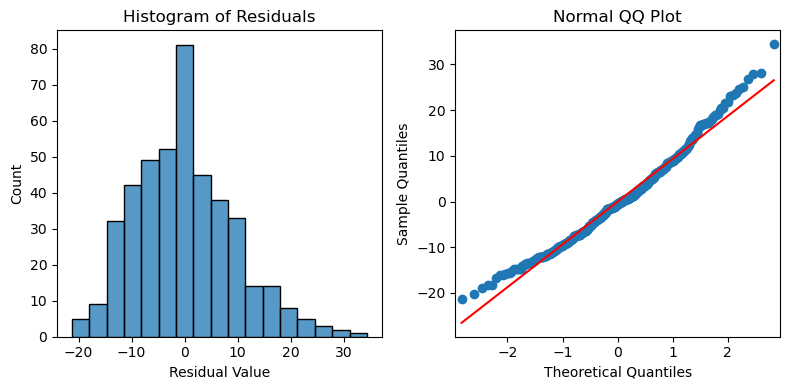

In [192]:
# Calculate the residuals.


residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 


sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.


sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

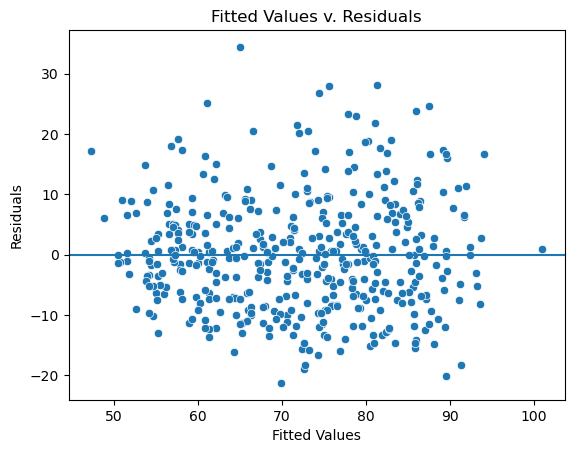

In [193]:
# Create a scatterplot with the fitted values from the model and the residuals.


fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.


fig.axhline(0)

# Show the plot.
plt.show()

Mean Squared Error: 1.9331665015849067


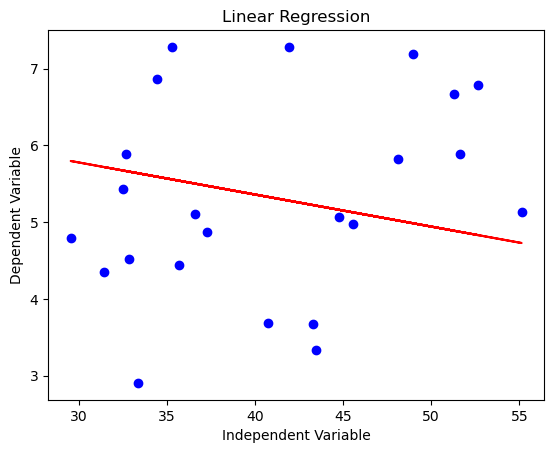

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#read the dataset
df = pd.read_csv("happyscore_income.csv")
df.head()
df1 = df[["avg_income", "median_income", "happyScore", "income_inequality"]]
df1.head()

# Step 2: Choose Independent and Dependent Variables
# Let's assume 'X' as the independent variable and 'Y' as the dependent variable
X = df1[['income_inequality']]
y = df1['happyScore']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build a Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = linear_reg.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 7: Visualize the Results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

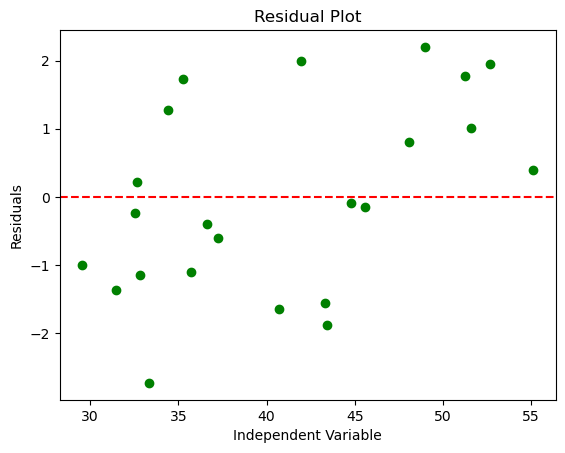

In [195]:
# Step 8: Model Verification - Residual Analysis
residuals = y_test - y_pred

plt.scatter(X_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Residuals')
plt.show()

In [196]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Task 6: Nonlinear Model - Polynomial Regression
# Define degree of polynomial
degree = 2  # Example: Quadratic polynomial

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE) for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Compare the performance of linear and polynomial regression models
print("Mean Squared Error (MSE) - Linear Regression:", mse_linear)
print("Mean Squared Error (MSE) - Polynomial Regression:", mse_poly)

Mean Squared Error (MSE) - Linear Regression: 1.9331665015849067
Mean Squared Error (MSE) - Polynomial Regression: 1.8538802214665568
